In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_excel("cancer patient data sets.xlsx", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High


In [4]:
new_h = df.iloc[0]
df = df[1:]
df.columns = new_h
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
5,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   object
 2   Gender                    1000 non-null   object
 3   Air Pollution             1000 non-null   object
 4   Alcohol use               1000 non-null   object
 5   Dust Allergy              1000 non-null   object
 6   OccuPational Hazards      1000 non-null   object
 7   Genetic Risk              1000 non-null   object
 8   chronic Lung Disease      1000 non-null   object
 9   Balanced Diet             1000 non-null   object
 10  Obesity                   1000 non-null   object
 11  Smoking                   1000 non-null   object
 12  Passive Smoker            1000 non-null   object
 13  Chest Pain                1000 non-null   object
 14  Coughing of Blood       

Text(0, 0.5, 'Count')

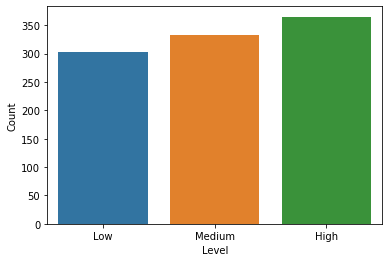

In [6]:
fig, ax = plt.subplots()
plot = sns.countplot(data=df, x='Level')
plt.xlabel('Level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

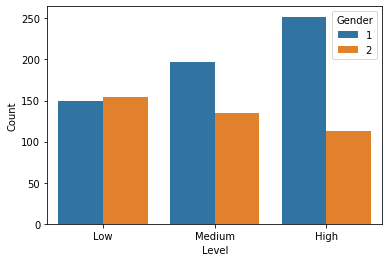

In [7]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='Level', hue='Gender')
plt.xlabel('Level')
plt.ylabel('Count')

## Feature Selection

In [8]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif

Text(0, 0.5, 'Feature')

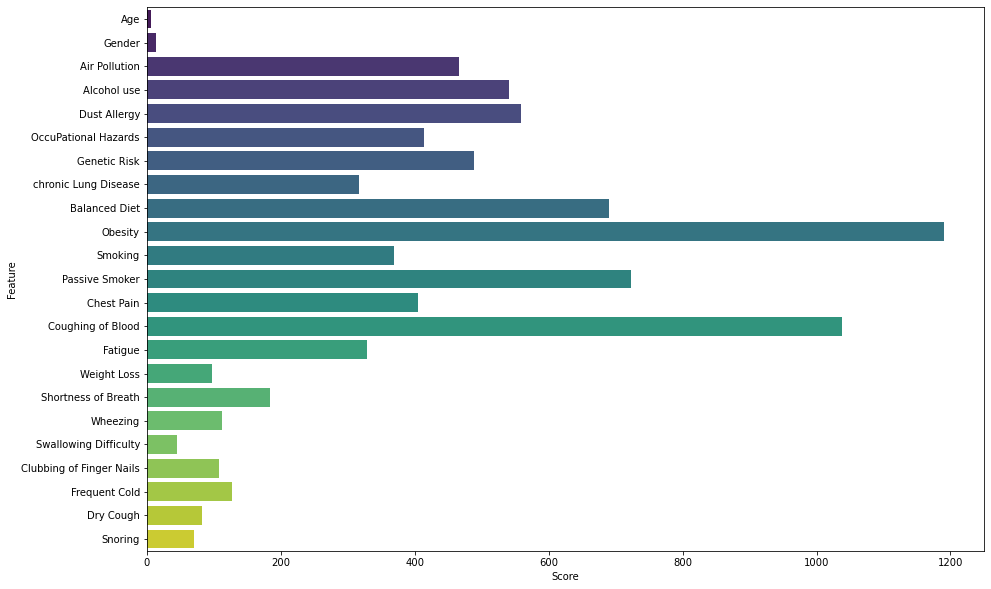

In [9]:
X = df.drop(['Level', 'Patient Id'], axis=1)
y = df['Level']
bestFeatures = SelectKBest(score_func = f_classif, k='all')
fit = bestFeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Visualizing
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis', orient='h')
plt.xlabel('Score')
plt.ylabel('Feature')

This plot shows the features that are more likely to cause lung cancer. We will take those that score more than 200.

In [10]:
# Selection
selection = featureScores[featureScores['Score']>200]
selection = list(selection['Feature'])
selection.append('Level')

cancerDf = df[selection]
cancerDf.head()

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
1,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
2,3,1,5,3,4,2,2,2,2,4,2,3,1,Medium
3,4,5,6,5,5,4,6,7,2,3,4,8,8,High
4,7,7,7,7,6,7,7,7,7,7,7,8,4,High
5,6,8,7,7,7,6,7,7,8,7,7,9,3,High


In [11]:
from sklearn.model_selection import train_test_split

X = cancerDf.drop(['Level'], axis=1)
y = cancerDf['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (800, 13)
y_train shape : (800,)
X_test shape : (200, 13)
y_test shape : (200,)


Scalling

In [12]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### SVM modelling with Grid Search

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

In [14]:
svm_param = {
    "C": [0.01, 0.1, 1, 5, 10, 100],
    "gamma": [0, 0.01, 0.1, 1, 5, 10, 100],
    "kernel": ["rbf", "linear" "poly"],
    "random_state": [0]
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=svm_param,
    scoring=None,
    n_jobs=-1,
    cv=10,
    verbose=0,
    return_train_score=True)

clf.fit(X=X_train_scaled, y=y_train)
preds = clf.predict(X_test_scaled)
cfmatrix = confusion_matrix(
            y_true=y_test, y_pred=preds)
print("Grid Search Results of SVC Grid")
print("The best parameters are: ", clf.best_params_)
print("Best trainning accuracy: \t", clf.best_score_)
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=preds))


Grid Search Results of SVC Grid
The best parameters are:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0}
Best trainning accuracy: 	 1.0
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        75
         Low       1.00      1.00      1.00        67
      Medium       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [15]:
import pickle

filename = 'lung_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

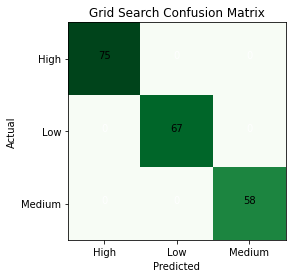

In [16]:
plt.subplots()
classes=sorted(cancerDf['Level'].unique())
plt.imshow(cfmatrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Grid Search Confusion Matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
thresh = cfmatrix.mean()
for i, j in itertools.product(range(cfmatrix.shape[0]), range(cfmatrix.shape[1])):
        plt.text(j, i, format(cfmatrix[i, j]), 
                 horizontalalignment="center",
                 color="white" if cfmatrix[i, j] < thresh else "black")

# 100% accuracy

## Loading and prediction using custom values

In [17]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

1.0
